In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Import the data
file = Path("Resources/lending_data.csv")
lend_df = pd.read_csv(file)
lend_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


## Prediction

I predict random forest to perform better since i feel as though the data is not linear and would cause it to perform better than logistic regression.

In [16]:
# Split the data into X_train, X_test, y_train, y_test
X = lend_df.drop("loan_status", axis=1)
y = lend_df["loan_status"].values
X_train, X_test, y_train, y_test = train_test_split(X,y)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [17]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier

LogisticRegression()

In [18]:
# Print Regression Model Score
classifier.fit(X_train, y_train)
print(f"Training Score: : {classifier.score(X_train, y_train)}")
print(f"Test Score: : {classifier.score(X_test, y_test)}")

Training Score: : 0.9921584812216261
Test Score: : 0.9922100701609575


In [19]:
# Create a confusion matrix
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18709,   100],
       [   51,   524]], dtype=int64)

In [20]:
# Print Accuracy
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9922100701609575


In [21]:
# Print Classification Report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18809
           1       0.84      0.91      0.87       575

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



## Random Forest

In [22]:
# Train a Random Forest Classifier model and print the model score
rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

In [23]:
# Print Scores
print(f'Training Score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test)}')

Training Score: 0.9973517677809878
Testing Score: 0.9917457697069748


[1.34368620e-01 2.72753613e-01 1.69107377e-01 1.65390740e-01
 1.04740680e-01 1.44454271e-04 1.53494516e-01]


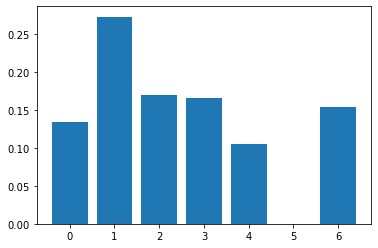

In [24]:
# Create a bar chart of feature importances
features = rfc.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [25]:
sel = SelectFromModel(rfc)
sel.fit(X_train_scaled, y_train)
sel.get_support()
sel.transform(X)

array([[7.67200000e+00, 5.28000000e+04, 4.31818182e-01, 2.28000000e+04],
       [6.69200000e+00, 4.36000000e+04, 3.11926606e-01, 1.36000000e+04],
       [6.96300000e+00, 4.61000000e+04, 3.49240781e-01, 1.61000000e+04],
       ...,
       [1.05950000e+01, 8.03000000e+04, 6.26400996e-01, 5.03000000e+04],
       [1.00680000e+01, 7.53000000e+04, 6.01593625e-01, 4.53000000e+04],
       [9.74200000e+00, 7.23000000e+04, 5.85062241e-01, 4.23000000e+04]])

In [26]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [27]:
# Print training and testing scores
rcf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {rcf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rcf.score(X_test_scaled, y_test)}')

Training Score: 0.9676537350392076
Testing Score: 0.9680664465538589


In [28]:
rcf = LogisticRegression()
rcf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {rcf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rcf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [29]:
rcf2 = RandomForestClassifier(max_depth=1)
rcf2.fit(X_selected_train_scaled,y_train)
print(f'Training Score: {rcf2.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rcf2.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9946003576833127
Testing Score: 0.9938609162195625


I predicted that the Random Forest Classifer would preform better but both performed about the same based on the scores.